In [1]:
# Import the necessary libraries and the functions script
import os
import sys
import functions as fn
import pandas as pd

In [2]:
import sys
sys.path.append(r".\notebooks")  
import functions as fn





In [3]:
# Load the stock data
file_path = (r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\data\MSFT_historical_data.csv")
data = fn.load_stock_data(file_path)

In [4]:

# Check the data to ensure it includes the required columns
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
if all(column in data.columns for column in required_columns):
    print("All required columns are present.")
else:
    missing_columns = [column for column in required_columns if column not in data.columns]
    print(f"Missing columns: {', '.join(missing_columns)}")

All required columns are present.


In [5]:
# Apply all technical indicators to the data
data = fn.apply_all_indicators(data)

In [6]:
# Apply all technical indicators to the data
data = fn.apply_all_indicators(data)



In [7]:
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,MA_Short,MA_Long,RSI,MACD,MACD_Signal,MACD_Hist
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:

def calculate_financial_metrics(data):
    """
    Calculate financial metrics such as Rolling Mean, Rolling Std, and Bollinger Bands.
    """
    data['Rolling_Mean'] = data['Adj Close'].rolling(window=20).mean()
    data['Rolling_Std'] = data['Adj Close'].rolling(window=20).std()
    
    data['Bollinger_High'] = data['Rolling_Mean'] + (data['Rolling_Std'] * 2)
    data['Bollinger_Low'] = data['Rolling_Mean'] - (data['Rolling_Std'] * 2)
    
    return data

# Apply the function
data = calculate_financial_metrics(data)

# Print the DataFrame columns to check if the new columns were added
print(data.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'MA_Short', 'MA_Long', 'RSI', 'MACD',
       'MACD_Signal', 'MACD_Hist', 'Rolling_Mean', 'Rolling_Std',
       'Bollinger_High', 'Bollinger_Low'],
      dtype='object')


In [9]:
# Print the columns to verify
print(data.columns)

# Display the first few rows to ensure data is as expected
print(data[['Date', 'Adj Close', 'Rolling_Mean', 'Rolling_Std', 'Bollinger_High', 'Bollinger_Low']].head())


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'MA_Short', 'MA_Long', 'RSI', 'MACD',
       'MACD_Signal', 'MACD_Hist', 'Rolling_Mean', 'Rolling_Std',
       'Bollinger_High', 'Bollinger_Low'],
      dtype='object')
        Date  Adj Close  Rolling_Mean  Rolling_Std  Bollinger_High  \
0 1986-03-13   0.059946           NaN          NaN             NaN   
1 1986-03-14   0.062087           NaN          NaN             NaN   
2 1986-03-17   0.063158           NaN          NaN             NaN   
3 1986-03-18   0.061552           NaN          NaN             NaN   
4 1986-03-19   0.060482           NaN          NaN             NaN   

   Bollinger_Low  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


In [10]:
# Display the first few rows with the calculated indicators and metrics
print(data[['Date', 'Adj Close', 'MA_Short', 'MA_Long', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Rolling_Mean', 'Rolling_Std', 'Bollinger_High', 'Bollinger_Low']].head())



        Date  Adj Close  MA_Short  MA_Long  RSI  MACD  MACD_Signal  MACD_Hist  \
0 1986-03-13   0.059946       NaN      NaN  NaN   NaN          NaN        NaN   
1 1986-03-14   0.062087       NaN      NaN  NaN   NaN          NaN        NaN   
2 1986-03-17   0.063158       NaN      NaN  NaN   NaN          NaN        NaN   
3 1986-03-18   0.061552       NaN      NaN  NaN   NaN          NaN        NaN   
4 1986-03-19   0.060482       NaN      NaN  NaN   NaN          NaN        NaN   

   Rolling_Mean  Rolling_Std  Bollinger_High  Bollinger_Low  
0           NaN          NaN             NaN            NaN  
1           NaN          NaN             NaN            NaN  
2           NaN          NaN             NaN            NaN  
3           NaN          NaN             NaN            NaN  
4           NaN          NaN             NaN            NaN  


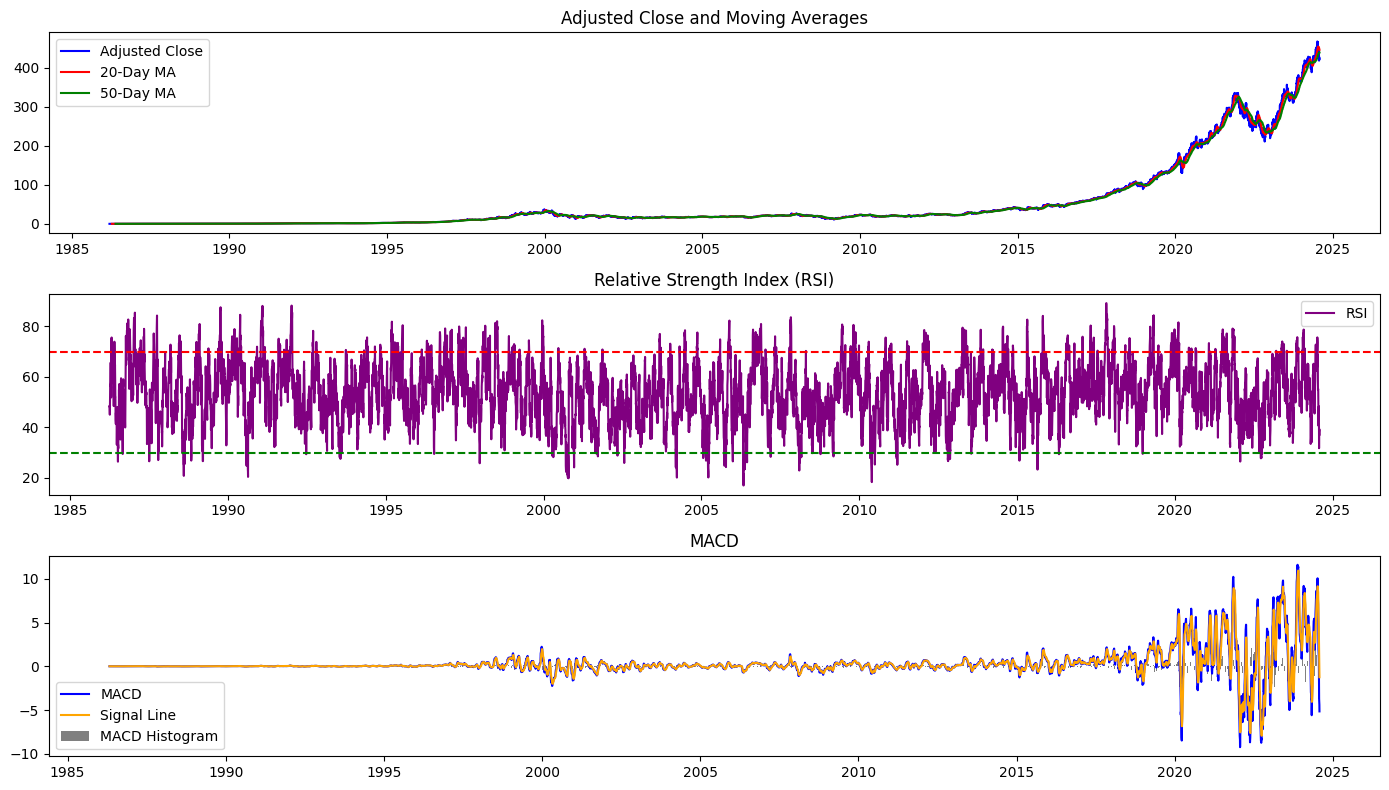

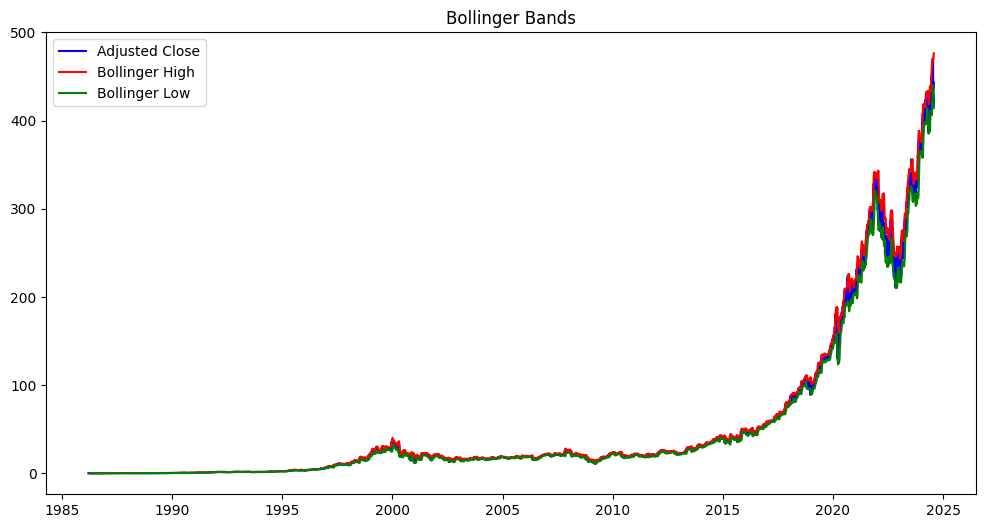

In [11]:
# Plot the technical indicators
fn.plot_technical_indicators(data)

# Plot the Bollinger Bands
fn.plot_bollinger_bands(data)